In [2]:
import sqlite3

def print_table_data(database_file):
    try:
        # Connect to the database
        conn = sqlite3.connect(database_file)
        cursor = conn.cursor()

        # Fetch all table names
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        if not tables:
            print("No tables found in the database.")
            return

        # Iterate through each table and print its data
        for table in tables:
            table_name = table[0]
            print(f"\nTable: {table_name}")
            cursor.execute(f"SELECT * FROM {table_name}")
            rows = cursor.fetchall()

            # Fetch column names
            column_names = [description[0] for description in cursor.description]
            print(" | ".join(column_names))  # Print column headers

            # Print each row
            for row in rows:
                print(" | ".join(map(str, row)))

    except sqlite3.Error as e:
        print(f"Database error: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    finally:
        # Close the database connection
        if conn:
            conn.close()

# Replace 'app.db' with your database file path if needed
print_table_data('app.db')


No tables found in the database.


In [ ]:
from datetime import datetime, timezone
from zoneinfo import ZoneInfo

utc_now = datetime.now(ZoneInfo("UTC"))
est_time = utc_now.astimezone(ZoneInfo("America/New_York"))


print("UTC Time:", utc_now)
print("Eastern Time:", est_time)

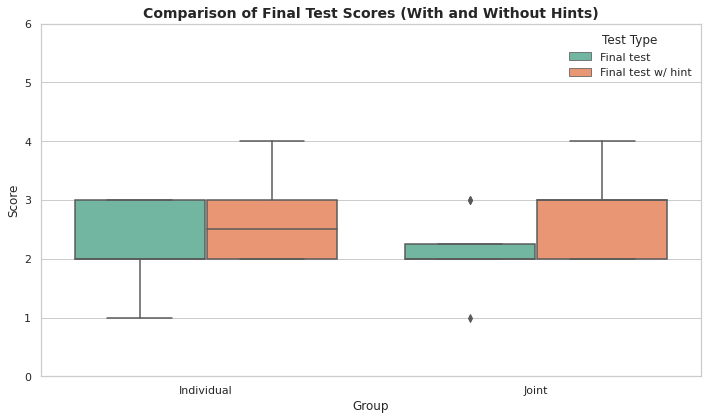

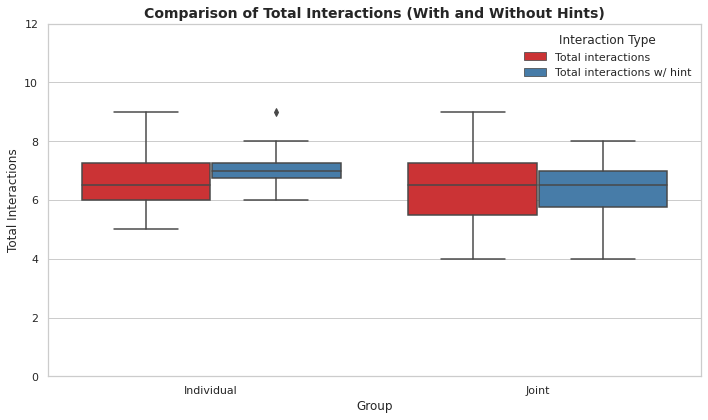

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Seaborn's modern style
sns.set(style="whitegrid")

# Data
data = {
    'Group': ['Individual - Low'] * 8 + ['Joint'] * 8 + 
             ['Individual - High'] * 8 + ['Common'] * 8,

    'Total interactions w/ hint': [
        # Individual - Low
        7, 7, 8, 6, 7, 6, 7, 9,
        # Joint
        6, 4, 7, 7, 7, 8, 5, 6,
        # Individual - High 
        5, 5, 6, 5, 5, 6, 5, 5,
        # Common 
        3, 4, 2, 3, 3, 4, 2, 3
    ]
}

# Expanded Data for Final Test Scores
data2 = {
    'Group': (['Individual - Low'] * 24 + 
              ['Joint'] * 24 + 
              ['Individual - High'] * 24 + 
              ['Common'] * 24),
    
    'Final test w/ hint': (
        # Individual 
        [3, 2, 3, 4, 3, 2, 2, 2, 3, 2, 4, 3, 3, 2, 3, 3, 4, 2, 3, 2, 4, 3, 2, 3] +
        
        # Joint 
        [4, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 2, 3, 4, 4, 3, 2, 3, 4, 4, 3, 2, 3, 4] +
        
        # Individual - High 
        [4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4] +
        
        # Common
        [2, 3, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 1, 2, 1]
    ),
    
}


# Convert to DataFrame
df = pd.DataFrame(data)

# --------- Plot 1: Final Test Scores ---------
# Melt DataFrame for test scores
df_scores = df.melt(id_vars='Group', value_vars=['Final test', 'Final test w/ hint'],
                    var_name='Test Type', value_name='Score')

# Create boxplot for final test scores
plt.figure(figsize=(10, 6))
ax1 = sns.boxplot(x='Group', y='Score', hue='Test Type', data=df_scores, palette='Set2')

# Set Y-axis range
ax1.set(ylim=(0, 6))

# Titles and labels
plt.title('Comparison of Final Test Scores (With and Without Hints)', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Display legend and plot
plt.legend(title='Test Type', loc='upper right')
plt.tight_layout()
plt.show()


# --------- Plot 2: Total Interactions ---------
# Melt DataFrame for total interactions
df_interactions = df.melt(id_vars='Group', value_vars=['Total interactions', 'Total interactions w/ hint'],
                          var_name='Interaction Type', value_name='Interactions')

# Create boxplot for total interactions
plt.figure(figsize=(10, 6))
ax2 = sns.boxplot(x='Group', y='Interactions', hue='Interaction Type', data=df_interactions, palette='Set1')

# Set Y-axis range to better visualize interactions
ax2.set(ylim=(0, 12))

# Titles and labels
plt.title('Comparison of Total Interactions (With and Without Hints)', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Interactions', fontsize=12)

# Display legend and plot
plt.legend(title='Interaction Type', loc='upper right')
plt.tight_layout()
plt.show()


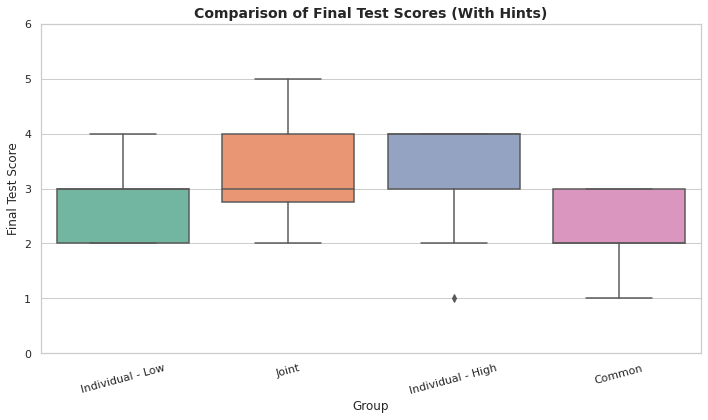

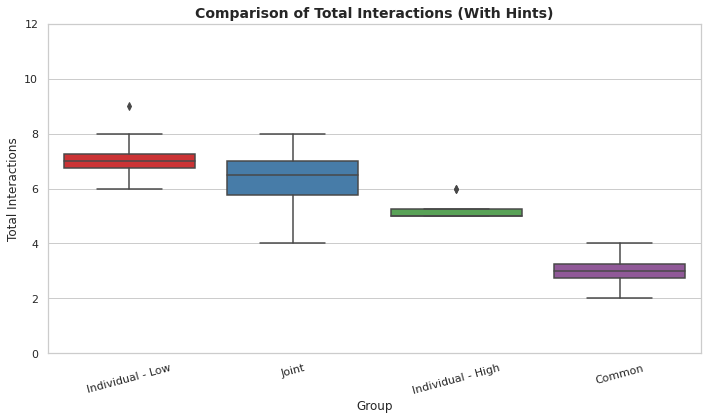

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Seaborn's modern style
sns.set(style="whitegrid")

# Total Interactions Data
data_interactions = {
    'Group': ['Individual - Low'] * 8 + ['Joint'] * 8 + 
             ['Individual - High'] * 8 + ['Common'] * 8,

    'Total interactions w/ hint': [
        7, 7, 8, 6, 7, 6, 7, 9,  # Individual - Low
        6, 4, 7, 7, 7, 8, 5, 6,  # Joint
        5, 5, 6, 5, 5, 6, 5, 5,  # Individual - High
        3, 4, 2, 3, 3, 4, 2, 3   # Common
    ]
}

# Final Test Scores Data
data_scores = {
    'Group': (['Individual - Low'] * 24 + 
              ['Joint'] * 24 + 
              ['Individual - High'] * 24 + 
              ['Common'] * 24),
    
    'Final test w/ hint': (
        [3, 2, 3, 4, 3, 2, 2, 2, 3, 2, 4, 3, 3, 2, 3, 3, 4, 2, 3, 2, 4, 3, 2, 3] +  # Individual - Low
        [4, 3, 3, 2, 2, 2, 3, 3, 5, 4, 3, 2, 3, 4, 5, 3, 2, 3, 4, 4, 3, 2, 3, 4] +  # Joint
        [4, 4, 3, 2, 4, 1, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 3, 4, 3, 4] +  # Individual - High
        [2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2]    # Common
    )
}

# Convert to DataFrames
df_interactions = pd.DataFrame(data_interactions)
df_scores = pd.DataFrame(data_scores)

# --------- Plot 1: Final Test Scores ---------
plt.figure(figsize=(10, 6))
ax1 = sns.boxplot(x='Group', y='Final test w/ hint', data=df_scores, palette='Set2')

# Set Y-axis range
ax1.set(ylim=(0, 6))

# Titles and labels
plt.title('Comparison of Final Test Scores (With Hints)', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Final Test Score', fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=15)

# Display plot
plt.tight_layout()
plt.show()

# --------- Plot 2: Total Interactions ---------
plt.figure(figsize=(10, 6))
ax2 = sns.boxplot(x='Group', y='Total interactions w/ hint', data=df_interactions, palette='Set1')

# Set Y-axis range
ax2.set(ylim=(0, 12))

# Titles and labels
plt.title('Comparison of Total Interactions (With Hints)', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Interactions', fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=15)

# Display plot
plt.tight_layout()
plt.show()
